# Attrition in an Organization-------Why Workers Quit?

### Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

### Expensive in terms of both money and time to train new employees.
### Loss of experienced employees
### Impact in productivity
### Impact profit
### Before getting our hands dirty with the data, first step is to frame the business question. Having clarity on below questions is very crucial because the solution that is being developed will make sense only if we have well stated problem.

### Business questions to brainstorm:
### What factors are contributing more to employee attrition?
### What type of measures should the company take in order to retain their employees?
### What business value does the model bring?
### Will the model save lots of money?
### Which business unit faces the attrition problem?

# Import Package

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')

# 1. Data Understanding

In [2]:
# read the csv-type dataset as original dataset 

data = pd.read_csv(r'C:\Users\27079\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# check basic information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.isnull().sum()  #check missing value

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data.nunique()    # check uniqueness of each column

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [8]:
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [9]:
categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("--------------------------------------------------------------------------------------------")

Attrition : ['Yes' 'No']
--------------------------------------------------------------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
--------------------------------------------------------------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
--------------------------------------------------------------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
--------------------------------------------------------------------------------------------
Gender : ['Female' 'Male']
--------------------------------------------------------------------------------------------
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
---------------------------------------------

# 2. Data Visualisation

In [10]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

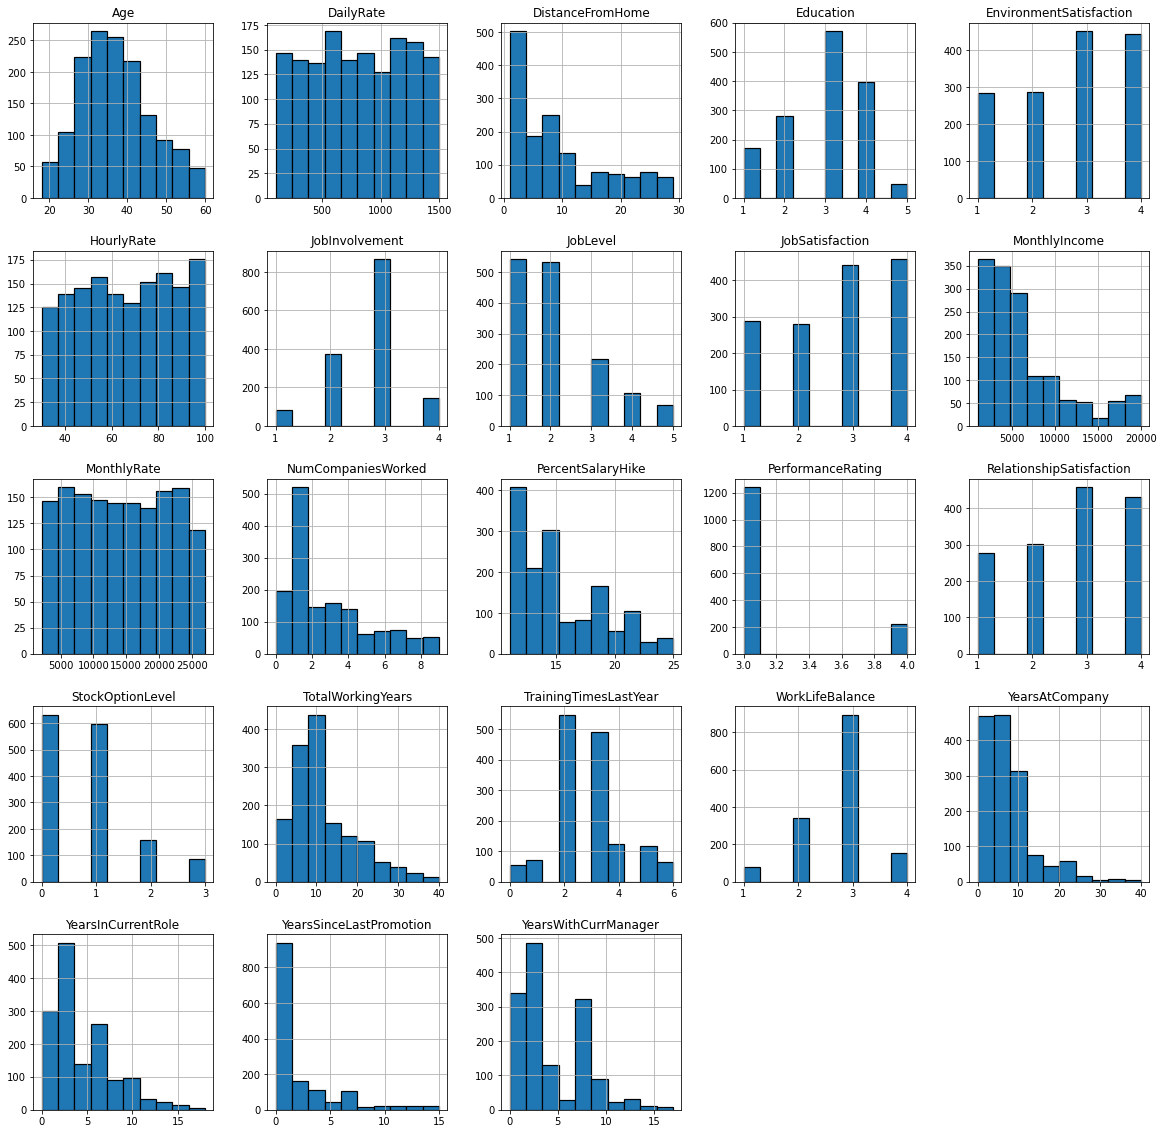

In [11]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

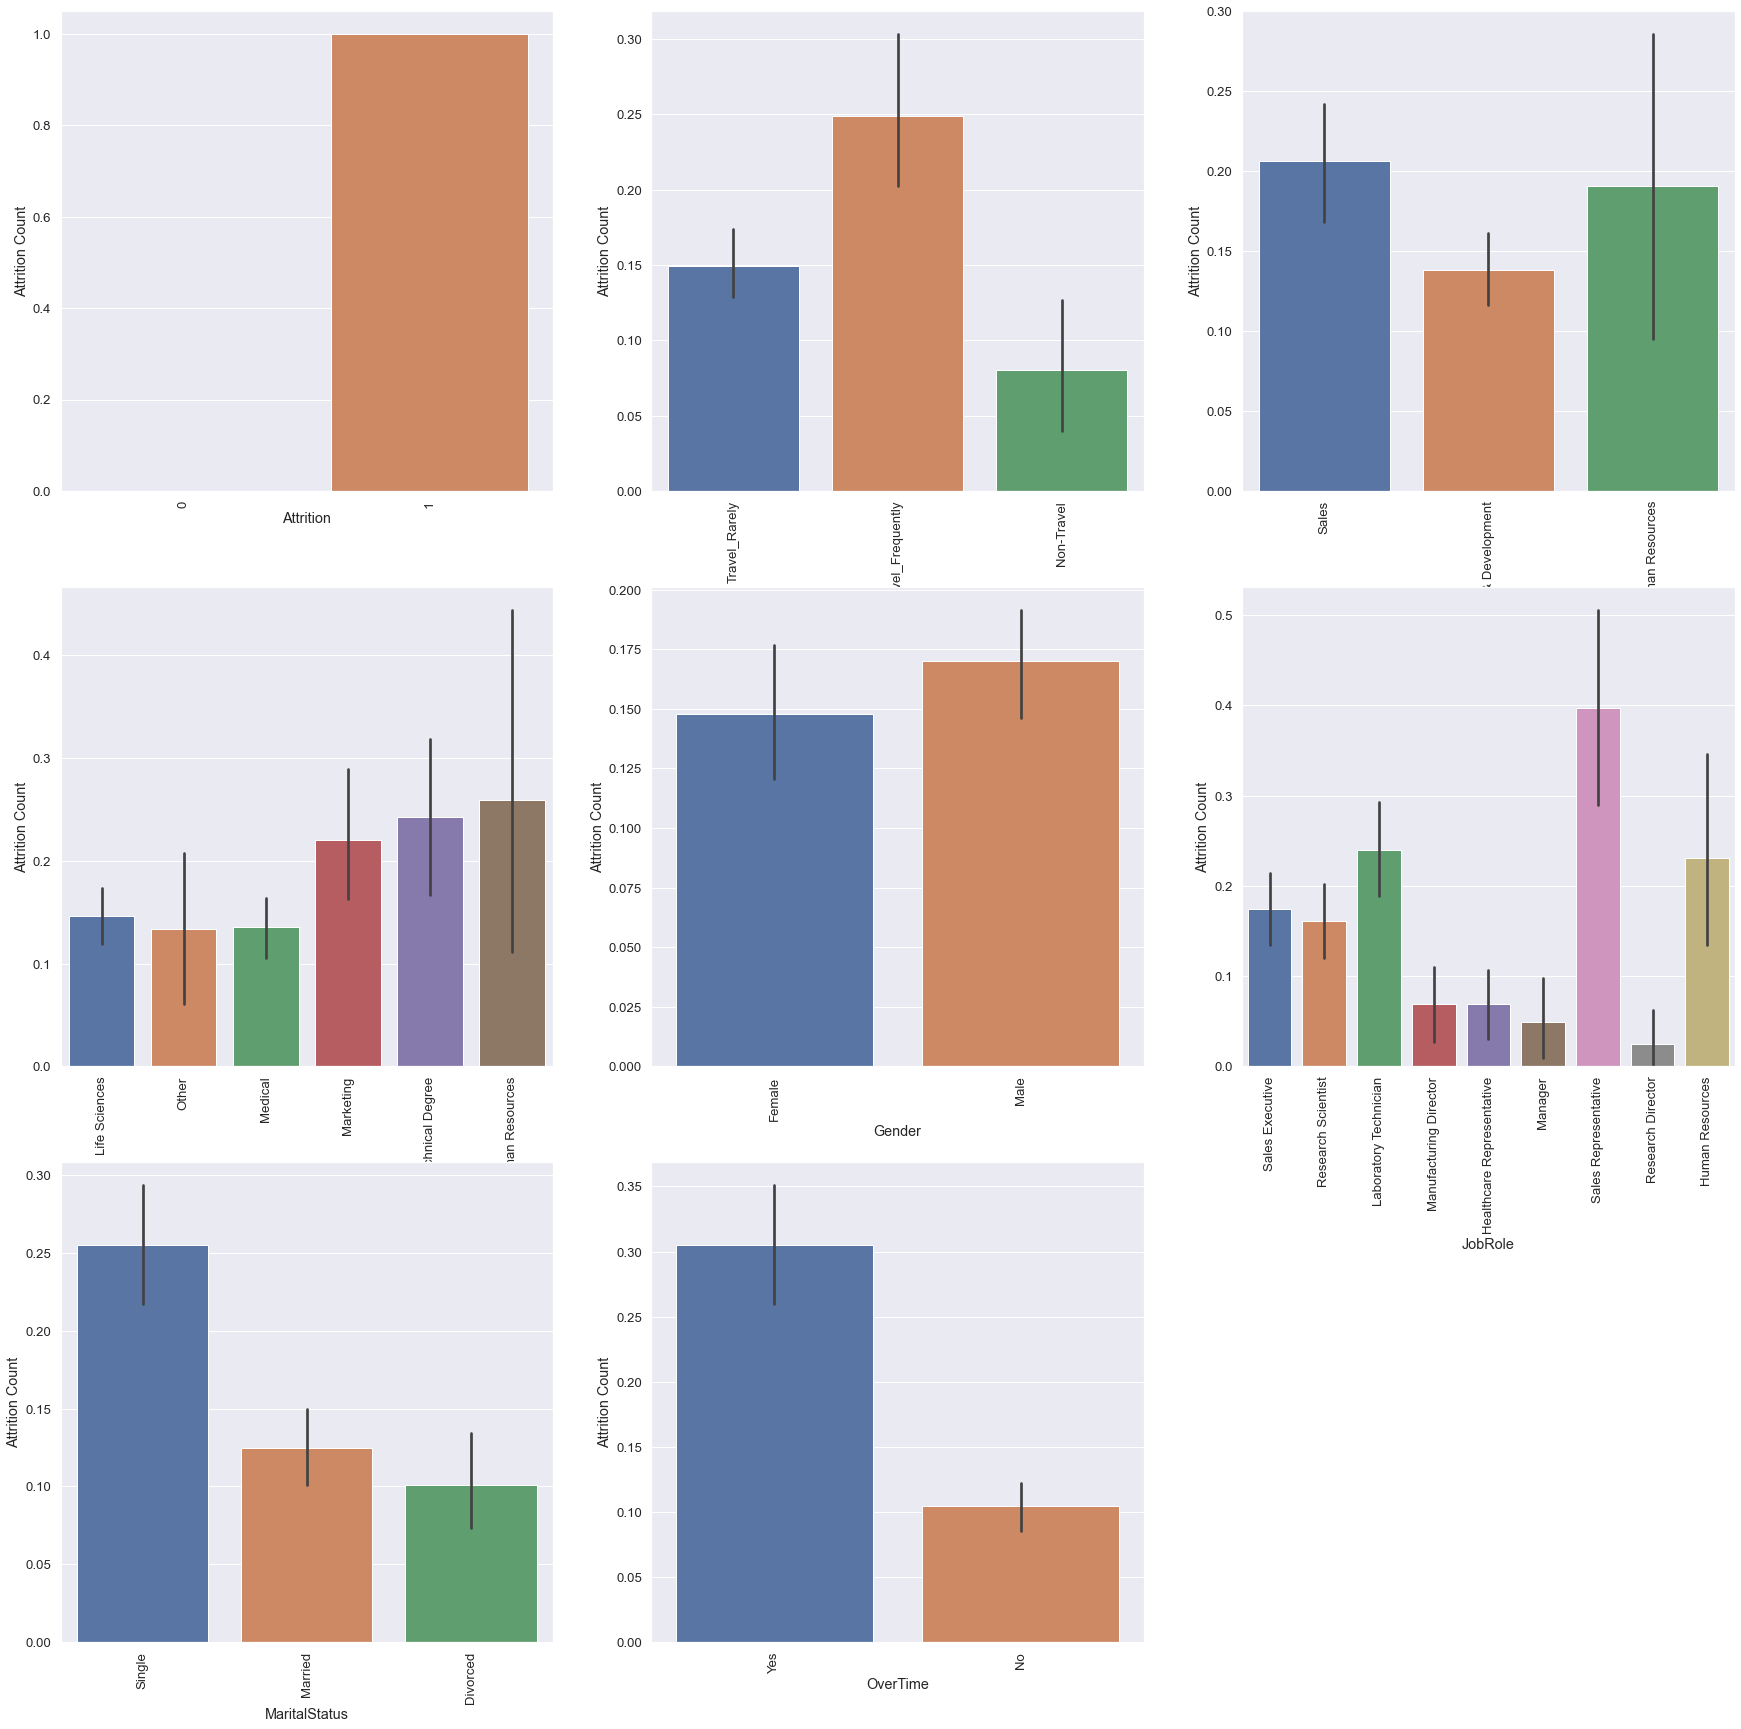

In [12]:
data['Attrition'] = data.Attrition.astype("category").cat.codes

# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=data)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

# Data analysis conclusion

### BusinessTravel : The workers who travel alot are more likely to quit then other employees.

### Department : The worker in Research & Development are more likely to stay then the workers on other departement.

### EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

### Gender : The Male are more likely to quit.

### JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

### MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

### OverTime : The workers who work more hours are likely to quit then others.

# 3. Correlation Matrix

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.00,-0.16,0.01,-0.00,0.21,0.01,0.02,0.03,0.51,-0.00,...,0.00,0.05,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
Attrition,-0.16,1.00,-0.06,0.08,-0.03,-0.10,-0.01,-0.13,-0.17,-0.10,...,0.00,-0.05,-0.14,-0.17,-0.06,-0.06,-0.13,-0.16,-0.03,-0.16
DailyRate,0.01,-0.06,1.00,-0.00,-0.02,0.02,0.02,0.05,0.00,0.03,...,0.00,0.01,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
DistanceFromHome,-0.00,0.08,-0.00,1.00,0.02,-0.02,0.03,0.01,0.01,-0.00,...,0.03,0.01,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,-0.03,-0.02,0.02,1.00,-0.03,0.02,0.04,0.10,-0.01,...,-0.02,-0.01,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EnvironmentSatisfaction,0.01,-0.10,0.02,-0.02,-0.03,1.00,-0.05,-0.01,0.00,-0.01,...,-0.03,0.01,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
HourlyRate,0.02,-0.01,0.02,0.03,0.02,-0.05,1.00,0.04,-0.03,-0.07,...,-0.00,0.00,0.05,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02
JobInvolvement,0.03,-0.13,0.05,0.01,0.04,-0.01,0.04,1.00,-0.01,-0.02,...,-0.03,0.03,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03
JobLevel,0.51,-0.17,0.00,0.01,0.10,0.00,-0.03,-0.01,1.00,-0.00,...,-0.02,0.02,0.01,0.78,-0.02,0.04,0.53,0.39,0.35,0.38
JobSatisfaction,-0.00,-0.10,0.03,-0.00,-0.01,-0.01,-0.07,-0.02,-0.00,1.00,...,0.00,-0.01,0.01,-0.02,-0.01,-0.02,-0.00,-0.00,-0.02,-0.03


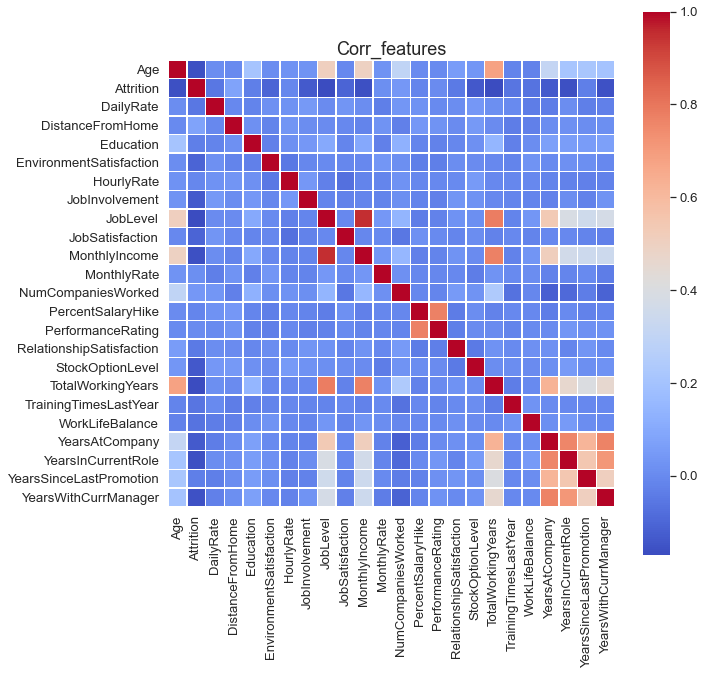

In [13]:
corr = data.corr()
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('Corr_features', size=18);
corr

## Analysis of correlation results (sample analysis):

### Monthly income is highly correlated with Job level.
### Job level is highly correlated with total working hours.
### Monthly income is highly correlated with total working hours.
### Age is also positively correlated with the Total working hours.

# 4. Data Preparation

In [14]:
data['Attrition'] = [ str(x) for x in data['Attrition'] ]
data['Attrition']=data['Attrition'].replace(['Yes','No'],['1','0'])
data['Attrition'] = [ int(x) for x in data['Attrition'] ]

In [15]:
X = data.drop('Attrition', axis=1)
y = data.Attrition

In [16]:
X= pd.get_dummies(X)

In [17]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0


In [18]:
X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou

In [19]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [20]:
oversampler=SMOTE()
X, y = oversampler.fit_sample(X,y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

# 5. Machine Learning Algorithms

# a）Logistic Regression

In [23]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_pred1 = lr_classifier.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred1))

Accuracy: 0.7550607287449392


In [24]:
## 10-fold cross-validation 
cv_scores =cross_val_score(lr_classifier, X, y, cv=10,scoring='accuracy')
# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, lr_classifier.predict(X_test)))
print()
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),5)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),5)))


              precision    recall  f1-score   support

           0       0.77      0.74      0.75       250
           1       0.75      0.77      0.76       244

    accuracy                           0.76       494
   macro avg       0.76      0.76      0.76       494
weighted avg       0.76      0.76      0.76       494


Average 10-Fold CV Score: 0.6902 , Standard deviation: 0.03016


[[186  64]
 [ 57 187]]


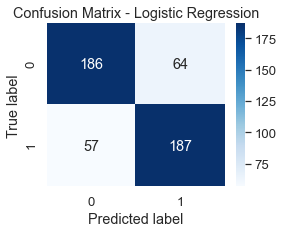

In [25]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,lr_classifier.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");
print(ConfMatrix)

# b）Decision Tree 

In [26]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred2 = tree_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred2))

Accuracy: 0.8623481781376519


In [27]:
## 10-fold cross-validation 
cv_scores =cross_val_score(tree_clf, X, y, cv=10,scoring='accuracy')
# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, tree_clf.predict(X_test)))
print()
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),5)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),5)))


              precision    recall  f1-score   support

           0       0.86      0.87      0.86       250
           1       0.86      0.86      0.86       244

    accuracy                           0.86       494
   macro avg       0.86      0.86      0.86       494
weighted avg       0.86      0.86      0.86       494


Average 10-Fold CV Score: 0.85206 , Standard deviation: 0.09341


In [28]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
y_pred2 = tree_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred2))

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3724 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 11724 tasks      | elapsed:   20.0s


Best paramters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'})
Accuracy: 0.888663967611336


[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   22.3s finished


In [29]:
## 10-fold cross-validation 
cv_scores =cross_val_score(tree_clf, X, y, cv=10,scoring='accuracy')
# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, tree_clf.predict(X_test)))
print()
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),5)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),5)))


              precision    recall  f1-score   support

           0       0.88      0.91      0.89       250
           1       0.90      0.87      0.89       244

    accuracy                           0.89       494
   macro avg       0.89      0.89      0.89       494
weighted avg       0.89      0.89      0.89       494


Average 10-Fold CV Score: 0.87561 , Standard deviation: 0.11829


[[227  23]
 [ 32 212]]


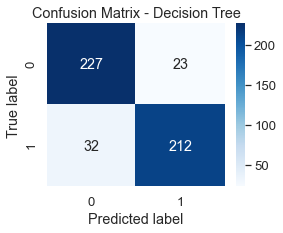

In [30]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,tree_clf.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");
print(ConfMatrix)

# c) Random Forest

In [31]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred3 = rf_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred3))

Accuracy: 0.9352226720647774


In [32]:
## 10-fold cross-validation 
cv_scores =cross_val_score(rf_clf, X, y, cv=10,scoring='accuracy')
# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, rf_clf.predict(X_test)))
print()
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),5)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),5)))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       250
           1       0.97      0.90      0.93       244

    accuracy                           0.94       494
   macro avg       0.94      0.93      0.94       494
weighted avg       0.94      0.94      0.94       494


Average 10-Fold CV Score: 0.92669 , Standard deviation: 0.10924


In [33]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)
y_pred3 = rf_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred3))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


Best paramters: {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False})
Accuracy: 0.9392712550607287


In [34]:
## 10-fold cross-validation 
cv_scores =cross_val_score(rf_clf, X, y, cv=10,scoring='accuracy')
# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, rf_clf.predict(X_test)))
print()
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),5)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),5)))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       250
           1       0.97      0.91      0.94       244

    accuracy                           0.94       494
   macro avg       0.94      0.94      0.94       494
weighted avg       0.94      0.94      0.94       494


Average 10-Fold CV Score: 0.93318 , Standard deviation: 0.10746


[[243   7]
 [ 23 221]]


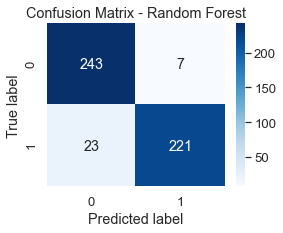

In [35]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,rf_clf.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");
print(ConfMatrix)

# d) XGBoost

In [36]:
xgb = XGBClassifier()
param_dist = {
        'n_estimators':range(80,200,4),
        'max_depth':range(2,15,1),
        'learning_rate':np.linspace(0.01,2,20),
        'subsample':np.linspace(0.7,0.9,20),
        'colsample_bytree':np.linspace(0.5,0.98,10),
        'min_child_weight':range(1,9,1)
        }

grid = RandomizedSearchCV(xgb,param_dist,cv = 3,scoring = 'neg_log_loss',n_iter=300,n_jobs = -1)
grid.fit(X_train, y_train)
best_estimator = grid.best_estimator_
print(best_estimator)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.11473684210526315, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=144, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [37]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.11473684210526315, max_delta_step=0, max_depth=12,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=144, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb.fit(X_train, y_train)
y_pred4 = xgb.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred4))

Accuracy: 0.9271255060728745


In [38]:
## 10-fold cross-validation 
cv_scores =cross_val_score(xgb, X, y, cv=10)
# Print the 10-fold cross-validation scores
print()
print(classification_report(y_test, y_pred4, digits=3))
print()
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),5)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),5)))


              precision    recall  f1-score   support

           0      0.896     0.968     0.931       250
           1      0.964     0.885     0.923       244

    accuracy                          0.927       494
   macro avg      0.930     0.927     0.927       494
weighted avg      0.930     0.927     0.927       494


Average 10-Fold CV Score: 0.92345 , Standard deviation: 0.11282


[[242   8]
 [ 28 216]]


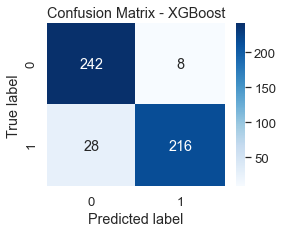

In [39]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,xgb.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - XGBoost");
print(ConfMatrix)

# e) KNN

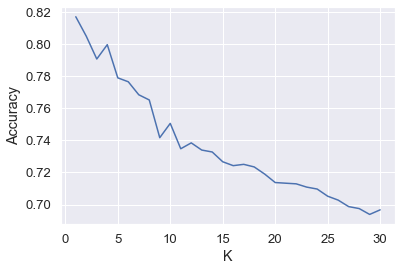

In [40]:
k_range = range(1,31)
cv_scores = [] #用来放每个模型的结果值
for n in k_range:
    knn= KNeighborsClassifier(n) #knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy') #cv：选择每次测试折数 accuracy：评价指标是准确度,可以省略使用默认值，具体使用参考下面。
    cv_scores.append(scores.mean())
plt.plot(k_range,cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy') #通过图像选择最好的参数
plt.show()

In [41]:
best_knn = KNeighborsClassifier(n_neighbors=1) # 选择最优的K=1传入模型
best_knn.fit(X_train,y_train) #训练模型
y_pred5 = best_knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred5))

Accuracy: 0.8097165991902834


In [42]:
## 10-fold cross-validation 
cv_scores =cross_val_score(best_knn, X, y, cv=10)
# Print the 10-fold cross-validation scores
print()
print(classification_report(y_test, y_pred5, digits=3))
print()
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),5)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),5)))


              precision    recall  f1-score   support

           0      0.906     0.696     0.787       250
           1      0.748     0.926     0.828       244

    accuracy                          0.810       494
   macro avg      0.827     0.811     0.808       494
weighted avg      0.828     0.810     0.807       494


Average 10-Fold CV Score: 0.8171 , Standard deviation: 0.02496


[[174  76]
 [ 18 226]]


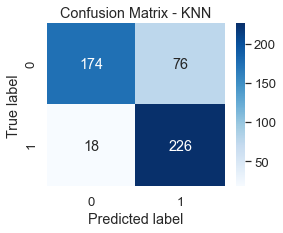

In [43]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,best_knn.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - KNN");
print(ConfMatrix)

# The ROC-AUC score

In [44]:
y_pred_proba_lr_classifier = lr_classifier.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_lr_classifier)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_lr_classifier)

y_pred_proba_tree_clf = tree_clf.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_tree_clf)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_tree_clf)

y_pred_proba_rf_clf = rf_clf.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_rf_clf)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_rf_clf)

y_pred_proba_xgb = xgb.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y_pred_proba_xgb)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba_xgb)

y_pred_proba_best_knn = best_knn.predict_proba(X_test)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test,  y_pred_proba_best_knn)
auc5 = metrics.roc_auc_score(y_test, y_pred_proba_best_knn)

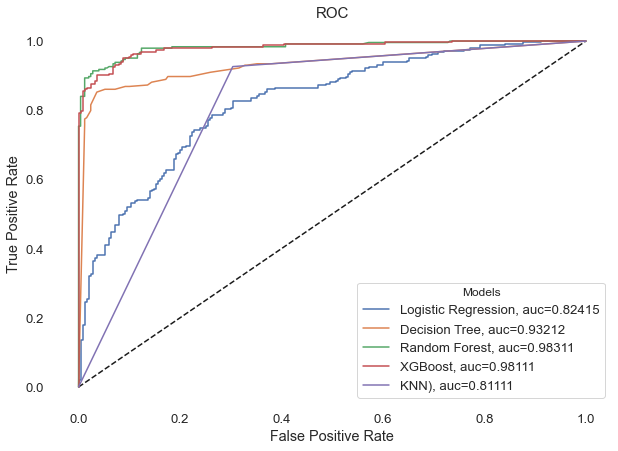

In [45]:
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr1,tpr1,label="Logistic Regression, auc="+str(round(auc1,5)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc2,5)))
plt.plot(fpr3,tpr3,label="Random Forest, auc="+str(round(auc3,5)))
plt.plot(fpr4,tpr4,label="XGBoost, auc="+str(round(auc4,5)))
plt.plot(fpr5,tpr5,label="KNN), auc="+str(round(auc5,5)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

# Features importance(Random Forest)

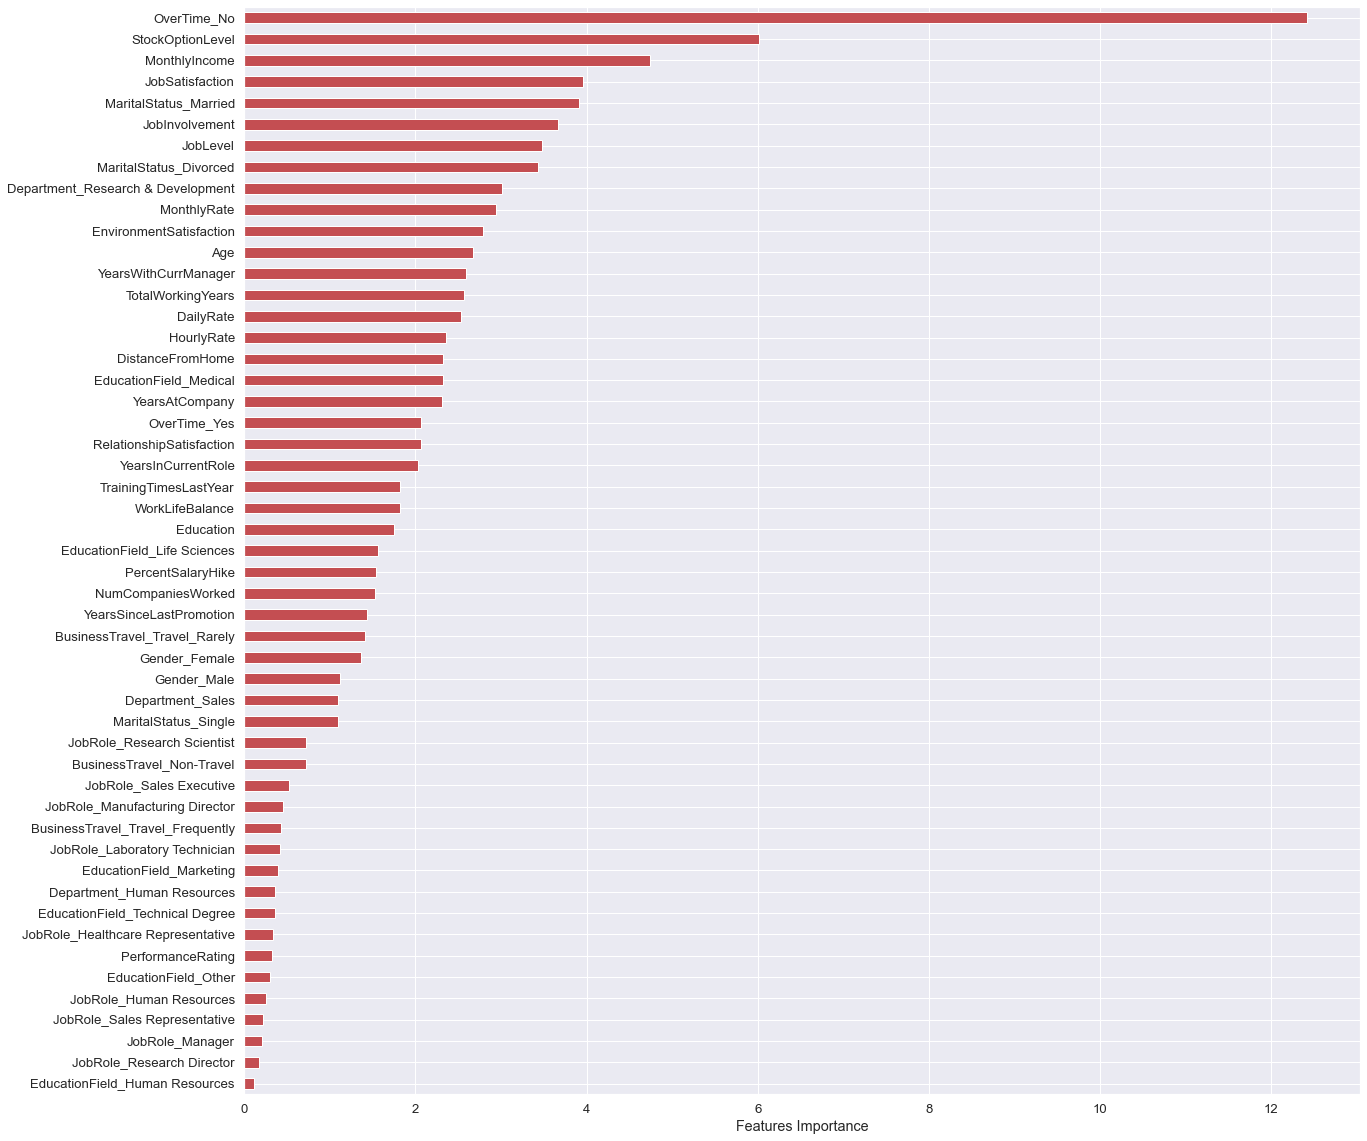

In [49]:
Importance = pd.DataFrame({'Importance':rf_clf.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r',figsize=(20, 20) )
plt.xlabel('Features Importance')
plt.gca().legend_ = None

# Features importance(XGBoost)

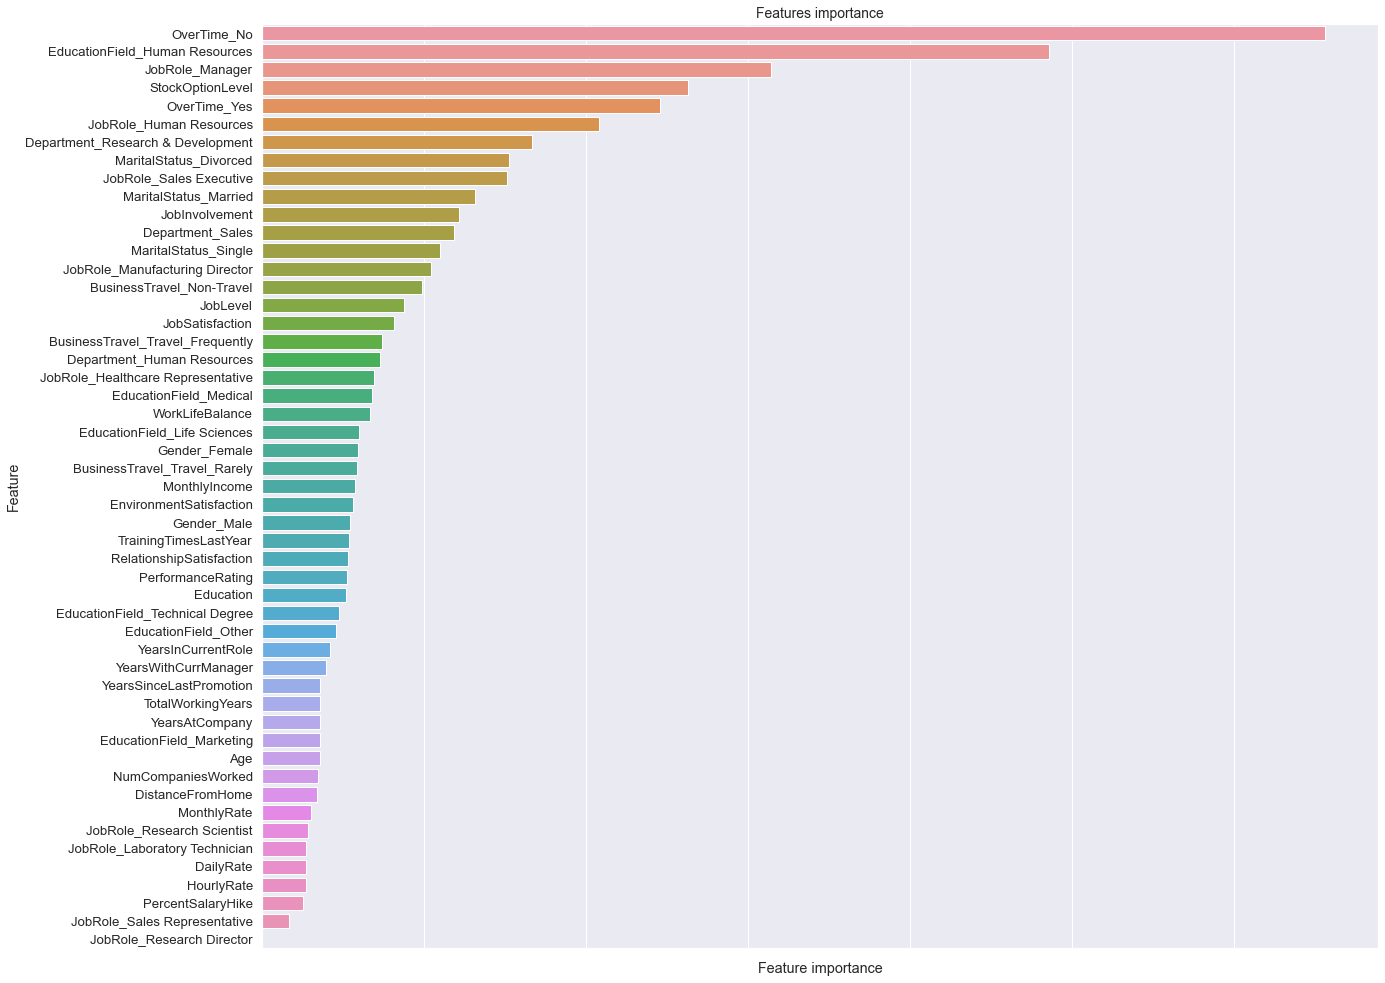

In [50]:
tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': xgb.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (20,17))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature importance',y='Feature',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   